# Chebyshev, Markov and CLT comparison - Coin Toss Example

### Description:
Consider an example where we toss a fair coin 100 times. We are interested to find the probability of getting atleast 'h' number of heads. We can model this problem using Random Variables, where a tail is 0, head is 1 and Sn will be the sum of 'n' such tosses. 

We will plot the actual probabilities, bound from Markov inequality, Chebyshev inequality and the Central limit theorem approximation of P(Sn>=h).

### Code

Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats

Random Variables, its distribution and expected values

In [2]:
X = [0,1] # Do not change these values considering how the problem is defined -- fixed --
p = 0.5 # Probability of heads -- configurable --
f_X = [1-p,p]
n = 100  # Number of coin tosses -- configurable -- 

def expectation(random_variable,PMF):
    return np.sum(np.multiply(random_variable,PMF))
    
E_X = expectation(X,f_X)

def variance(random_variable,PMF,E_X):
    return np.sum(np.multiply((random_variable-E_X)**2,PMF))

var_X = variance(X,f_X,E_X)

# Sn = Sum of 'n' i.i.d. random variables of X
E_Sn = n*E_X
var_Sn = n*var_X

print "E[X] =", E_X, ", var[X] =", var_X
print "E[Sn] =", E_Sn, ", var[Sn] =", var_Sn

E[X] = 0.5 , var[X] = 0.25
E[Sn] = 50.0 , var[Sn] = 25.0


Functions

In [3]:
def fac(x): # returns the factorial of x
    prod = 1
    i = 1
    while (i<=x):
        prod = prod*i
        i = i+1
    return prod

def combi(n,r): # returns the nCr value
    return fac(n)*1.0 / (fac(n-r)*fac(r))

nCr_prob_list = []
for i in range(0,n+1):
    nCr_prob_list.append(combi(n,i)*math.pow(f_X[1],i)*math.pow(f_X[0],n-i))

def actual_prob(epsilon):
    su = 0
    for j in range(epsilon,n+1):
        su = su + nCr_prob_list[j]
    return su

def markov(epsilon):
    if(epsilon <= E_Sn): return 1 # limiting probability values to utmost of 1
    else: return E_Sn*1.0/epsilon
    
def expectation_Sn_power_b(b):
    su = 0
    for i in range(0,n):
        su = su + math.pow(i,b) * (combi(n,i)*math.pow(f_X[1],i)*math.pow(f_X[0],n-i))
    return su    
    
def bound_b(eps,b):
    if (eps==0): return 1
    bound_value = expectation_Sn_power_b(b)*1.0/math.pow(eps,b)
    if (eps==0 or bound_value>=1): return 1
    else: return bound_value
    
def chernoff(eps):
    val =  1.0 * math.pow(n,n) * (math.pow(p,eps)*math.pow(1-p,n-eps)) / (math.pow(eps,eps) * math.pow(n-eps,n-eps) )
    if (eps<=n*p or val>=1): return 1
    else: return val
    
def clt(epsilon):
    return 1.0 - scipy.stats.norm.cdf((epsilon-E_Sn)/math.sqrt(1.0*var_Sn))

Initialization of lists

In [4]:
epsilon_list = [] # Values ranging from [0,n+1] which should give us P(Sn>=eps) from [1,0]
actual_prob_list = [] # Actual probability of Sn >= x
markov_list = [] # Markov bound array
bound_2_list = []
bound_3_list = []
bound_4_list = []
chernoff_list = []
clt_list = [] # Central limit theorem predicted values

Computations

In [5]:
for i in range(0,n+2):
    epsilon_list.append(i)
    actual_prob_list.append(actual_prob(i))
    markov_list.append(markov(i))
    bound_2_list.append(bound_b(i,2))
    bound_3_list.append(bound_b(i,3))
    bound_4_list.append(bound_b(i,4))
    chernoff_list.append(chernoff(i))
    clt_list.append(clt(i))

Plots

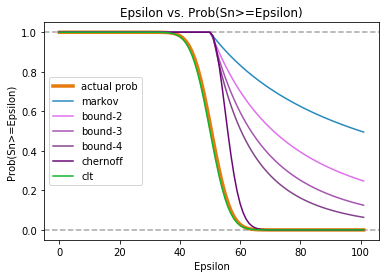

In [6]:
plt.axhline(y=0, color='#a8a8a7',linestyle='dashed')  
plt.axhline(y=1, color='#a8a8a7',linestyle='dashed')  

plt.plot(epsilon_list,actual_prob_list,color='#e67b10',linewidth=3.5,label='actual prob')
plt.plot(epsilon_list,markov_list,color='#268abd',label='markov')
plt.plot(epsilon_list,bound_2_list,color='#de71eb',label='bound-2')
plt.plot(epsilon_list,bound_3_list,color='#a654b0',label='bound-3')
plt.plot(epsilon_list,bound_4_list,color='#84438c',label='bound-4')
plt.plot(epsilon_list,chernoff_list,color='#690775',label='chernoff')
plt.plot(epsilon_list,clt_list,color='#10b52e',label='clt')

plt.title("Epsilon vs. Prob(Sn>=Epsilon)")
plt.xlabel("Epsilon")
plt.ylabel("Prob(Sn>=Epsilon)")
plt.legend()

plt.show()

### Conclusion

From the plot we can see how the higher orders of the equivalent chebyshev bounds are usually better than the markov bound. The chernoff bound seems to be doing very well out of all of these for higher 'n' values.
CLT is still the closest approximation.